In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




In [3]:
# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', padding='valid', input_shape=(28, 28, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

C:\Users\zameer.ali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395,130 (1.51 MB)

 Trainable params: 395,130 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1125s 1s/step - accuracy: 0.8536 - loss: 0.4621 - val_accuracy: 0.9756 - val_loss: 0.0781
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1029s 1s/step - accuracy: 0.9765 - loss: 0.0756 - val_accuracy: 0.9805 - val_loss: 0.0645
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 989s 1s/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9856 - val_loss: 0.0506
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1094s 1s/step - accuracy: 0.9884 - loss: 0.0401 - val_accuracy: 0.9872 - val_loss: 0.0429
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 925s 1s/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9872 - val_loss: 0.0418
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 965s 1s/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9860 - val_loss: 0.0548
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1084s 1s/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9909 - val_loss: 0.0302
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 895s 1s/step - accuracy: 0.9949 - loss: 0.0164 - val_

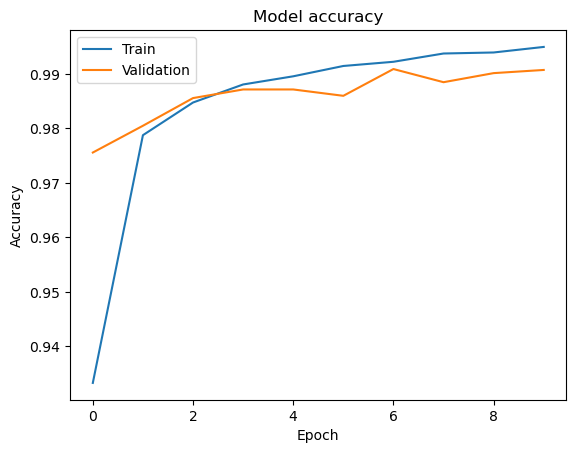

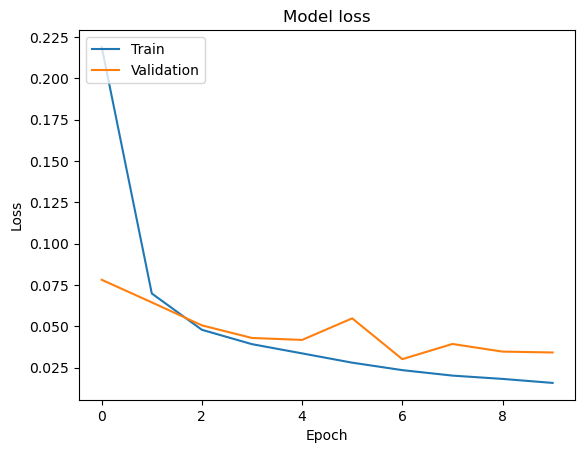

In [5]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()